# Running GIPSY-X with xProcess

This is a tutorial on how to use xProcess python scripts to process GPS data using jpl's GIPSY-X



## GIPSY-X installation

If GIPSY-X is not installed on the computer are using you will need to install it. There are pretty straight forward installation instructions but they are hard to find. They are in the release notes! Or online [here](https://gipsy-oasis.jpl.nasa.gov/gipsy/docs/ReleaseNotesGipsyX-Beta.pdf) (you will beed to be a registered GIPSY user). 

Make sure to add all the scripts to your path, this is done using the provided shell script in the main Gipsy-X directory. You could also add this to your bashrc/profile if you want it to be more permanent. 

`source rc_GipsyX.sh`

To make sure that everything is setup correctly. Run:
`./verify.py`


## xProcess install 

The Code for xProcess is found here on [Github](https://github.com/nvoss12838/xProcess)!

To install it:

`cd /dir/with/xProcess/`

open the file station.py

edit line 27:
```python
ionfile = '/home/nvoss/goa-var/cddis.gsfc.nasa.gov/gps/products/ionex'
```
such that it points to the directory where your ionex files are...

`python setup.py install`


## What is xProcess ?

It is a collection of 3 python classes
1. timeseries class
    - holds a timeseries of processed data

2. station class
    - holds info about a station 
    - important functions:
        -Process: process the gps station

3. network class
    - basically a class for holding a bunch of stations so that you can just run process once. 
    
   


## A note on Trees

Trees are the input files for gipsyx. It is where the paramater files are all stored. 

The general format is: 
main
    branch
        subbranch

where the main part is the object that is open and then the branches are attributes. 

At the top of the tree are the variables that need to be set for your work enviornment. Please ensure the paths are correct when you copy a tree, the head of the file looks like this:
```    
GEOPFILE == GNSSinitValues/GNSS.eo

GNSSORB_POS  == GNSSinitValues/GNSS.pos

GNSS_WLPB    == GNSSinitValues/GNSS.wlpb

GNSS_ANT_OFF_PCM == GNSSinitValues/GNSS.pcm

GNSSXYZ_FILE == /home/nvoss/tools/gipsyx/goa-var/etc/antenna_cals_xmit/igs08_1930.xyz

GNSSLIST     == gnssList.txt

XYZFILE_STATIONS == allStations.xyz

STATIONLIST == stations.txt

GLOBAL_EPOCH == 550238400            # 2017-06-09 00:00:00.000000

FILTER_STOP  == 550324785            # 2017-06-09 23:59:45.000000

DATARECORD_FILE == dataRecordFile.gz

STA_DB == /home/nvoss/tools/xProcess/xProcess/example_notebooks/rinexStaDb

OCEANLOAD == Off

StationCovOnOff == On

IONEXFILE == /home/nvoss/goa-var/cddis.gsfc.nasa.gov/gps/products/ionex/2017/160/jplg1600.17i

VMF1DIR == /home/nvoss/goa-var/VMF1GRID/VMF1
```

You can find an example tree in the Trees directory of xProcess called Nick_0.tree

I suggest buiing a tree that you like and then just copying it around. The xProcess script will replace the ionex files, and the epoch automatically.  



    

## A single station example 

In [1]:
import station
#uncomment to see station attributes
#station.Station?

In [2]:
bon2 = station.Station('BON2',9.765,-85.202,17,data='/home/nvoss/tools/xProcess/xProcess/example_notebooks/BON2/*/*')

In [ ]:
bon2.process(tree='Trees',start_date=2017.0,end_date=2017.2)

In [30]:
import pandas as pd
# i am not positive about these column names 
df = pd.read_fwf('BON2.series',\
                 names=['dyr','x','y','z','xx','yy','zz','xy','yz','xz','year','sec','m','d','hr','s','ms'])

Populating the interactive namespace from numpy and matplotlib


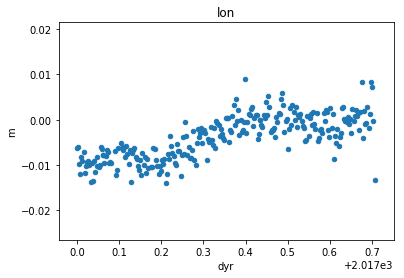

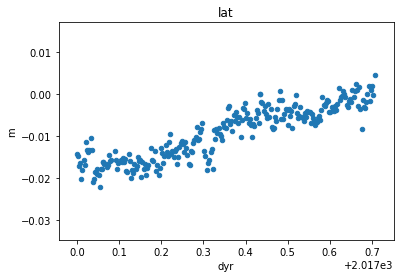

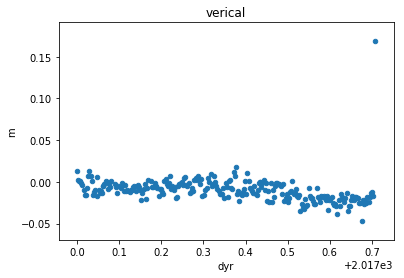

In [28]:
%pylab inline 

df.plot(x='dyr',y='x',kind='scatter')
plt.ylabel('m')
plt.title('lon')
df.plot(x='dyr',y='y',kind='scatter')
plt.ylabel('m')
plt.title('lat')
df.plot(x='dyr',y='z',kind='scatter')
plt.ylabel('m')
plt.title('verical')

## A network example 

We can use the network class to process a list of stations. They can be initialized through a list of station objects as done in the station example, or there is a provided function for reading the list of stations from a text file. 

In [1]:
import network

In [8]:
net = network.Network()

In [9]:
net.addStations('station_list.txt')

In [10]:
[sta.name for sta in net.stations]

['BIJA', 'BON2', 'CABA']

In [11]:
net.process(start=2017.0,end=2017.2)